##### Environment Code (Always Run)

In [1]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

FOLDERNAME = 'CS696DS/696ds_project1'
%cd /content/drive/My\Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/MyDrive/CS696DS/696ds_project1


In [ ]:
!pip install -r requirements.txt

In [3]:
#Set path of python code modules
import sys
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME))

%load_ext autoreload
%autoreload 2

##### Imports

In [4]:
import json
import os
from tqdm.auto import tqdm
import openai
import time
import sys
import numpy as np
from numpy import mean
import torch
import nltk
import pandas as pd
import random
import matplotlib.pyplot as plt
from statistics import stdev
from scipy.stats import spearmanr
from transformers import LEDTokenizerFast, GPT2TokenizerFast
from itertools import chain
import math
from typing import Tuple, List

from src.nli_modular import SummNLI
from src.trivial_baseline_utils import (
    get_combined_data,
    calc_ds,
    compare_orig_para,
    get_ds_scores,
    create_para_data_diff,
    create_para_data_same,
    check_written_dataset
)
  

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

##### Created Combined Dataset (One-Time Use Only)

In [ ]:
# function in ./paraphrase_analysis_utils.py
restructured_data = get_combined_data()

In [ ]:
check_written_dataset(restructured_data)
json.dump(restructured_data, open("combined_data.json", 'w'))

# DS Orig(Gen/Refs) vs Paraphrase

#### Without Length Constraint

##### **Get Paraphrases** For Reference and Generated Summaries **(Without length constraint)**

In [ ]:
paraphrase_data_1 = create_para_data_diff(orig_dataset_path='./combined_data.json')
check_written_dataset(paraphrase_data_1)

In [ ]:
# replace "paraphrase_data_11.json" with "paraphrase_data_1.json"
json.dump(paraphrase_data_1, open('paraphrase_data_11.json', 'w'))

##### Get **DS Scores** for reference and generated summaries (original and paraphrased) 



In [ ]:
ds_gen_orig = get_ds_scores(dataset_path='./combined_data.json', is_paraphrase=False, orig_type='gen')
ds_gen_para = get_ds_scores(dataset_path='./paraphrase_data_1.json', is_paraphrase=True, orig_type='gen')
ds_refs_orig = get_ds_scores(dataset_path='./combined_data.json', is_paraphrase=False, orig_type='refs')
ds_refs_para = get_ds_scores(dataset_path='./paraphrase_data_1.json', is_paraphrase=True, orig_type='refs')

print(f"µ(DS-generated-original: {mean(ds_gen_orig)}")
print(f"µ(DS)-generated-paraphrased: {mean(ds_gen_para)}")
print(f"µ(DS)-ref-original: {mean(ds_refs_orig)}")
print(f"µ(DS)-ref-paraphrased: {mean(ds_refs_para)}")

µ(DS-generated-original: 0.731580709766537
µ(DS)-generated-paraphrased: 0.7725023457671539
µ(DS)-ref-original: 0.7159772589131813
µ(DS)-ref-paraphrased: 0.75789233614661


##### Compare DS Scores


GENERATED VS PARAPHRASE


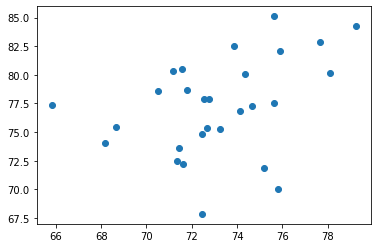


 Separate Statistics 

generated-orig | µ(DS) = 73.2 | σ(DS) = 2.9
generated-para | µ(DS) = 77.3 | σ(DS) = 4.2

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.3513957307060755, pvalue=0.06671173140041392)
Correlation = 0.38
µ(generated-para) = -4.1 | σ(generated-para) = 4.1 


REFERENCE VS PARAPHRASE


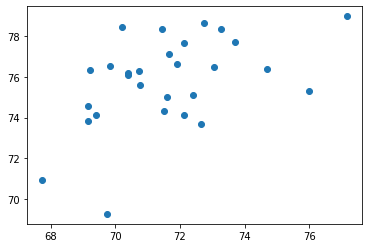


 Separate Statistics 

reference-orig | µ(DS) = 71.6 | σ(DS) = 2.1
reference-para | µ(DS) = 75.8 | σ(DS) = 2.2

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.4510125889436234, pvalue=0.016004065915319703)
Correlation = 0.48
µ(reference-para) = -4.2 | σ(reference-para) = 2.2 



In [ ]:
## Generated vs Paraphrase
compare_orig_para(ds_gen_orig, ds_gen_para, 'generated')

## Reference vs Paraphrase
compare_orig_para(ds_refs_orig, ds_refs_para, 'reference')

##### Get **BERT Scores** for reference and generated summaries (original and paraphrased) 



In [ ]:
bs_gen_orig = get_ds_scores(dataset_path='./combined_data.json', is_paraphrase=False, orig_type='gen', score_fn_name='calc_bertscore')
bs_gen_para = get_ds_scores(dataset_path='./paraphrase_data_1.json', is_paraphrase=True, orig_type='gen', score_fn_name='calc_bertscore')
bs_refs_orig = get_ds_scores(dataset_path='./combined_data.json', is_paraphrase=False, orig_type='refs', score_fn_name='calc_bertscore')
bs_refs_para = get_ds_scores(dataset_path='./paraphrase_data_1.json', is_paraphrase=True, orig_type='refs', score_fn_name='calc_bertscore')

print(f"µ(BS-generated-original: {mean(bs_gen_orig)}")
print(f"µ(BS)-generated-paraphrased: {mean(bs_gen_para)}")
print(f"µ(BS)-ref-original: {mean(bs_refs_orig)}")
print(f"µ(BS)-ref-paraphrased: {mean(bs_refs_para)}")

Some weights of the model checkpoint at microsoft/deberta-xlarge-mnli were not used when initializing DebertaModel: ['pooler.dense.bias', 'classifier.bias', 'pooler.dense.weight', 'classifier.weight']
- This IS expected if you are initializing DebertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DebertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


µ(BS-generated-original: 0.2691315689257213
µ(BS)-generated-paraphrased: 0.26511586563927786
µ(BS)-ref-original: 0.2653553505383787
µ(BS)-ref-paraphrased: 0.26811529163803366


##### Compare BertScores


BERTSCORE | GENERATED VS PARAPHRASE


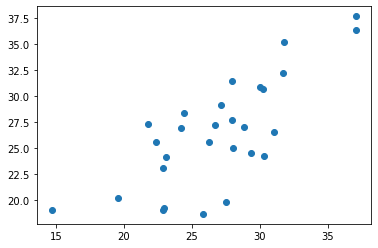


 Separate Statistics 

generated-orig | µ(BertScore) = 26.9 | σ(BertScore) = 4.8
generated-para | µ(BertScore) = 26.5 | σ(BertScore) = 5.1

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.6579091406677614, pvalue=0.00014182722223199368)
Correlation = 0.75
µ(generated-para) = 0.4 | σ(generated-para) = 3.5 


BERTSCORE | REFERENCE VS PARAPHRASE


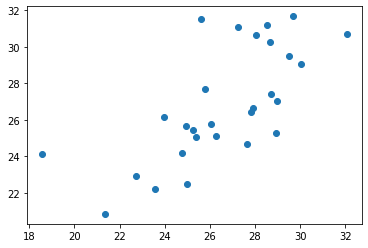


 Separate Statistics 

reference-orig | µ(BertScore) = 26.5 | σ(BertScore) = 2.8
reference-para | µ(BertScore) = 26.8 | σ(BertScore) = 3.1

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.7120963327859879, pvalue=2.1369662873951948e-05)
Correlation = 0.69
µ(reference-para) = -0.3 | σ(reference-para) = 2.3 



In [ ]:
## Generated vs Paraphrase
compare_orig_para(bs_gen_orig, bs_gen_para, 'generated', score_type='BertScore')

## Reference vs Paraphrase
compare_orig_para(bs_refs_orig, bs_refs_para, 'reference', score_type='BertScore')

#### With Length Constraint (within $+5\%$ of input length)

##### **Get Paraphrases** For Reference and Generated Summaries **(With length constraint)**


In [ ]:
# Not using these since the paraphrasing is done using GPT2 tokeizer
# model_name = 'allenai/led-base-16384'
# tokenizer = LEDTokenizerFast.from_pretrained(model_name)
tokenizer = GPT2TokenizerFast.from_pretrained('gpt2')

paraphrase_data_2 = create_para_data_diff(
    orig_dataset_path='./combined_data.json',
    control_length=True,
    n=5,
    dummy=True,
    tokenizer=tokenizer
    )

check_written_dataset(paraphrase_data_2)

{
  "train": {
    "count": 20,
    "entity_a": 20,
    "entity_b": 20,
    "para_refs_a": 60,
    "para_refs_b": 60,
    "para_refs_comm": 60
  },
  "dev": {
    "count": 10,
    "entity_a": 10,
    "entity_b": 10,
    "para_refs_a": 30,
    "para_refs_b": 30,
    "para_refs_comm": 30,
    "para_gen_a": 10,
    "para_gen_b": 10,
    "para_gen_comm": 10
  },
  "test": {
    "count": 18,
    "entity_a": 18,
    "entity_b": 18,
    "para_refs_a": 54,
    "para_refs_b": 54,
    "para_refs_comm": 54,
    "para_gen_a": 18,
    "para_gen_b": 18,
    "para_gen_comm": 18
  }
}


In [ ]:
# Change this to paraphrase_data_2 when you generate new ones
json.dump(paraphrase_data_2, open("./paraphrase_data_22.json", 'w'))

##### Get **DS Scores** for reference and generated summaries (original and paraphrased) 



In [ ]:
ds_gen_orig = get_ds_scores(dataset_path='./combined_data.json', is_paraphrase=False, orig_type='gen', score_fn_name='calc_ds')
ds_gen_para = get_ds_scores(dataset_path='./paraphrase_data_2.json', is_paraphrase=True, orig_type='gen', score_fn_name='calc_ds')
ds_refs_orig = get_ds_scores(dataset_path='./combined_data.json', is_paraphrase=False, orig_type='refs', score_fn_name='calc_ds')
ds_refs_para = get_ds_scores(dataset_path='./paraphrase_data_2.json', is_paraphrase=True, orig_type='refs', score_fn_name='calc_ds')

print(f"µ(DS-generated-original: {mean(ds_gen_orig)}")
print(f"µ(DS)-generated-paraphrased: {mean(ds_gen_para)}")
print(f"µ(DS)-ref-original: {mean(ds_refs_orig)}")
print(f"µ(DS)-ref-paraphrased: {mean(ds_refs_para)}")

µ(DS-generated-original: 0.731580709766537
µ(DS)-generated-paraphrased: 0.7603740096794388
µ(DS)-ref-original: 0.7159772589131813
µ(DS)-ref-paraphrased: 0.7574279488386753


##### Compare DS Scores


GENERATED VS PARAPHRASE


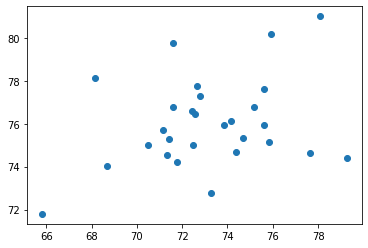


 Separate Statistics 

generated-orig | µ(DS) = 73.2 | σ(DS) = 2.9
generated-para | µ(DS) = 76.0 | σ(DS) = 2.1

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.20911454965227771, pvalue=0.28554570041352867)
Correlation = 0.30
µ(generated-para) = -2.9 | σ(generated-para) = 3.0 


REFERENCE VS PARAPHRASE


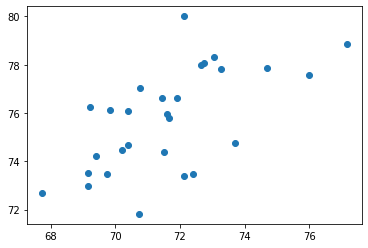


 Separate Statistics 

reference-orig | µ(DS) = 71.6 | σ(DS) = 2.1
reference-para | µ(DS) = 75.7 | σ(DS) = 2.1

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.6403940886699507, pvalue=0.00024198233342723378)
Correlation = 0.62
µ(reference-para) = -4.1 | σ(reference-para) = 1.8 



In [ ]:
## Generated vs Paraphrase
compare_orig_para(ds_gen_orig, ds_gen_para, 'generated')

## Reference vs Paraphrase
compare_orig_para(ds_refs_orig, ds_refs_para, 'reference')

##### Get **BERT Scores** for reference and generated summaries (original and paraphrased) 



In [ ]:
bs_gen_orig = get_ds_scores(dataset_path='./combined_data.json', is_paraphrase=False, orig_type='gen', score_fn_name='calc_bertscore')
bs_gen_para = get_ds_scores(dataset_path='./paraphrase_data_2.json', is_paraphrase=True, orig_type='gen', score_fn_name='calc_bertscore')
bs_refs_orig = get_ds_scores(dataset_path='./combined_data.json', is_paraphrase=False, orig_type='refs', score_fn_name='calc_bertscore')
bs_refs_para = get_ds_scores(dataset_path='./paraphrase_data_2.json', is_paraphrase=True, orig_type='refs', score_fn_name='calc_bertscore')

print(f"µ(BS-generated-original: {mean(bs_gen_orig)}")
print(f"µ(BS)-generated-paraphrased: {mean(bs_gen_para)}")
print(f"µ(BS)-ref-original: {mean(bs_refs_orig)}")
print(f"µ(BS)-ref-paraphrased: {mean(bs_refs_para)}")

µ(BS-generated-original: 0.2691315689257213
µ(BS)-generated-paraphrased: 0.27156466831054005
µ(BS)-ref-original: 0.2653553505383787
µ(BS)-ref-paraphrased: 0.2569446333107494


##### Compare BertScores


BERTSCORE | GENERATED VS PARAPHRASE


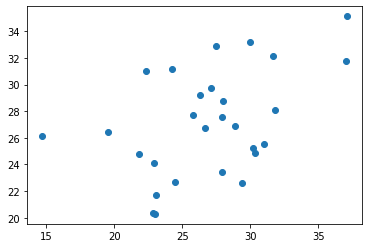


 Separate Statistics 

generated-orig | µ(BertScore) = 26.9 | σ(BertScore) = 4.8
generated-para | µ(BertScore) = 27.2 | σ(BertScore) = 3.9

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.4072249589490969, pvalue=0.031492131616535184)
Correlation = 0.46
µ(generated-para) = -0.2 | σ(generated-para) = 4.6 


BERTSCORE | REFERENCE VS PARAPHRASE


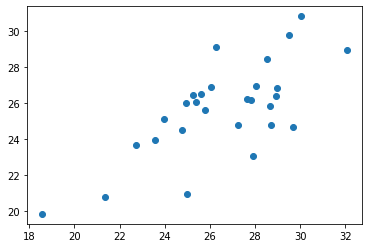


 Separate Statistics 

reference-orig | µ(BertScore) = 26.5 | σ(BertScore) = 2.8
reference-para | µ(BertScore) = 25.7 | σ(BertScore) = 2.5

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.6179529282977558, pvalue=0.00045814986440941425)
Correlation = 0.71
µ(reference-para) = 0.8 | σ(reference-para) = 2.1 



In [ ]:
## Generated vs Paraphrase
compare_orig_para(bs_gen_orig, bs_gen_para, 'generated', score_type='BertScore')

## Reference vs Paraphrase
compare_orig_para(bs_refs_orig, bs_refs_para, 'reference', score_type='BertScore')

# DS of $cont\;vs\;para\_cont\;vs\;para\_para\_cont$ (with length constraint)

##### Create Dataset of triples of gen_a, para(gen_a), para(gen_b)


In [ ]:
tokenizer = GPT2TokenizerFast.from_pretrained("gpt2")
paraphrase_data_3 = create_para_data_same(
    orig_dataset_path='./combined_data.json',
    src_summ = 'refs_a',
    control_length = True,
    n = 5,
    dummy = False,
    tokenizer=tokenizer
)
check_written_dataset(paraphrase_data_3)

In [ ]:
# Change this to the actual filename paraphrase_data_3.json only when you want new ones
json.dump(paraphrase_data_3, open('paraphrase_data_3_refs.json', 'w'))

##### Get **DS Scores** for Generated Paraphrase Triples of *gen_a, refs_a[0]*



In [ ]:
ds_gen_a_para = get_ds_scores(dataset_path='./paraphrase_data_3.json', is_paraphrase=False, orig_type='gen')
ds_ref_a_para = get_ds_scores(dataset_path='./paraphrase_data_3_refs.json', is_paraphrase=False, orig_type='gen')

print(f"µ(DS-gen_a-paraphrases): {mean(ds_gen_a_para)}")
print(f"µ(DS-gen_a-paraphrases): {mean(ds_ref_a_para)}")

µ(DS-gen_a-paraphrases): 0.5384404631383993
µ(DS-gen_a-paraphrases): 0.5259970488492628


In [ ]:
x = [100*value for value in ds_gen_a_para]
print(f"DS-gen_a-paraphrases | µ(DS) = {np.mean(x):.1f} | σ(DS) = {np.std(x):.1f}")
print()
x = [100*value for value in ds_ref_a_para]
print(f"DS-ref_a-paraphrases | µ(DS) = {np.mean(x):.1f} | σ(DS) = {np.std(x):.1f}")

DS-gen_a-paraphrases | µ(DS) = 53.8 | σ(DS) = 4.5

DS-ref_a-paraphrases | µ(DS) = 52.6 | σ(DS) = 4.4


##### Get **BertScores** for Generated Paraphrase Triples of *gen_a, refs_a[0]*



In [ ]:
bs_gen_a_para = get_ds_scores(dataset_path='./paraphrase_data_3.json', is_paraphrase=False, orig_type='gen', score_fn_name='calc_bertscore')
bs_ref_a_para = get_ds_scores(dataset_path='./paraphrase_data_3_refs.json', is_paraphrase=False, orig_type='gen', score_fn_name='calc_bertscore')

print(f"µ(BertScore-gen_a-paraphrases): {mean(bs_gen_a_para)}")
print(f"µ(BertScore-ref_a-paraphrases): {mean(bs_ref_a_para)}")

µ(BertScore-gen_a-paraphrases): 0.6390978842973709
µ(BertScore-ref_a-paraphrases): 0.614864207804203


In [ ]:
x = [100*value for value in bs_gen_a_para]
print(f"BertScore-gen_a-paraphrases | µ(BertScore) = {np.mean(x):.1f} | σ(BertScore) = {np.std(x):.1f}")
print()
x = [100*value for value in bs_ref_a_para]
print(f"BertScore-ref_a-paraphrases | µ(BertScore) = {np.mean(x):.1f} | σ(BertScore) = {np.std(x):.1f}")

BertScore-gen_a-paraphrases | µ(BertScore) = 63.9 | σ(BertScore) = 5.6

BertScore-ref_a-paraphrases | µ(BertScore) = 61.5 | σ(BertScore) = 5.9


# NLI (Contrast) Original vs Paraphrase

## Treat All Three Label Scores as Real Values

In [5]:
def nli_contrast_real_neut(data_path:str, pairwise_aggregation:str = 'sum', alphas: Tuple = (1,1,1)) -> List[float]:
  ## AGGREGATE NLI FOR ORIGINAL
  df = pd.read_csv(data_path)

  for label in ['cont','ent', 'neut']:
    if pairwise_aggregation == 'sum':
      df[f'agg_{label}'] = (df[f'1_2_{label}'] + df[f'2_1_{label}'])/2
    else:
      df[f'agg_{label}'] = np.maximum(df[f'1_2_{label}'], df[f'2_1_{label}'])

  pivot_sent1 = df.pivot_table(values = ['agg_neut'], index = ['Type','Sample','Sent1_entity', 'Sent2_entity', 'Sentence1'], aggfunc = 'mean', fill_value = 0).rename(mapper={'agg_neut':'agg_1_neut'}, axis=1)
  pivot_sent2 = df.pivot_table(values = ['agg_neut'], index = ['Type','Sample','Sent1_entity', 'Sent2_entity', 'Sentence2'], aggfunc = 'mean', fill_value = 0).rename(mapper={'agg_neut':'agg_2_neut'}, axis=1)


  df = df.join(other=pivot_sent1,on=['Type','Sample','Sent1_entity', 'Sent2_entity', 'Sentence1'])
  df = df.join(other=pivot_sent2,on=['Type','Sample','Sent1_entity', 'Sent2_entity', 'Sentence2'])

  # multipliers for each label
  alpha_ent = alphas[0]
  alpha_neut = alphas[1]
  alpha_cont = alphas[2]

  df['ent_final'] = alpha_ent * df['agg_ent']
  df['cont_final'] = alpha_cont * df['agg_cont']
  df['neut_final'] = alpha_neut * ((df['agg_1_neut']*df['1_2_neut']/2+df['agg_2_neut']*df['2_1_neut']/2))

  df['total'] = df['ent_final'] + df['cont_final'] + df['neut_final']

  # display(df)
  pivot_summ_pair = df.pivot_table(values = ['total'], index = ['Type','Sample'], aggfunc = 'mean', fill_value = 0)
  display(pivot_summ_pair)
  # display(pivot_summ_pair[pivot_summ_pair.index.isin(['ref'], level=0)])
  # df.to_csv("pivot_summ_fair.csv")

  return pivot_summ_pair[pivot_summ_pair.index.isin(['ref'], level=0)]['total'].to_list()


NLI_CONTRAST_ENT | REF VS PARAPHRASE


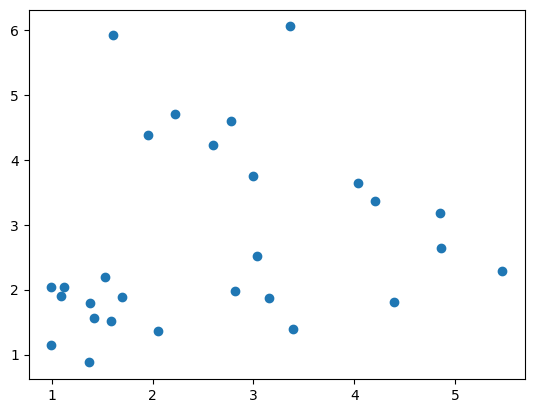


 Separate Statistics 

ref-orig | µ(nli_contrast_ent) = 2.6 | σ(nli_contrast_ent) = 1.3
ref-para | µ(nli_contrast_ent) = 2.7 | σ(nli_contrast_ent) = 1.4

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.36672140120415986, pvalue=0.05491902103338202)
Correlation = 0.21
µ(ref-para) = -0.1 | σ(ref-para) = 1.7 


NLI_CONTRAST_ENT | REF[0] VS PARAPHRASE


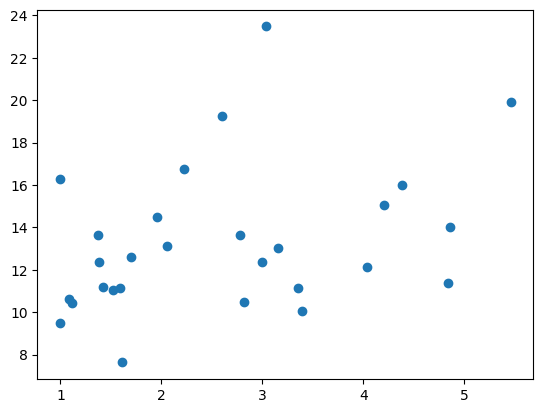


 Separate Statistics 

ref[0]-orig | µ(nli_contrast_ent) = 2.6 | σ(nli_contrast_ent) = 1.3
ref[0]-para | µ(nli_contrast_ent) = 13.3 | σ(nli_contrast_ent) = 3.4

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.35467980295566504, pvalue=0.06403291994997143)
Correlation = 0.35
µ(ref[0]-para) = -10.7 | σ(ref[0]-para) = 3.2 


NLI_CONTRAST_NEUT | REF VS PARAPHRASE


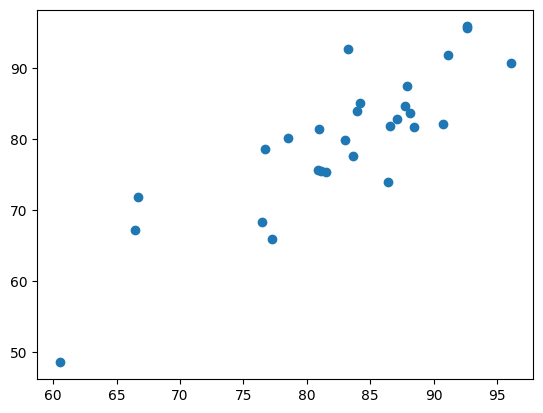


 Separate Statistics 

ref-orig | µ(nli_contrast_neut) = 82.9 | σ(nli_contrast_neut) = 8.1
ref-para | µ(nli_contrast_neut) = 80.0 | σ(nli_contrast_neut) = 9.9

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.8199233716475095, pvalue=9.351091771551746e-08)
Correlation = 0.85
µ(ref-para) = 2.9 | σ(ref-para) = 5.2 


NLI_CONTRAST_NEUT | REF[0] VS PARAPHRASE


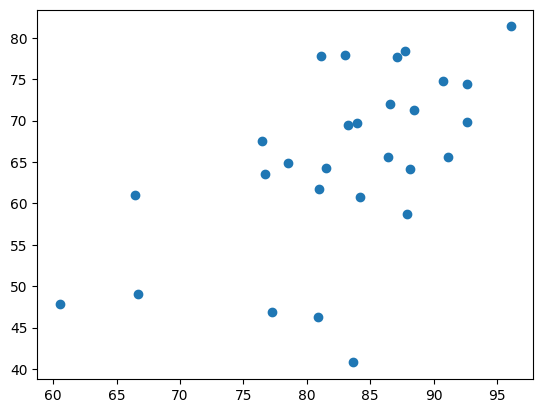


 Separate Statistics 

ref[0]-orig | µ(nli_contrast_neut) = 82.9 | σ(nli_contrast_neut) = 8.1
ref[0]-para | µ(nli_contrast_neut) = 65.1 | σ(nli_contrast_neut) = 10.7

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.5571975916803502, pvalue=0.0020692934516272116)
Correlation = 0.58
µ(ref[0]-para) = 17.8 | σ(ref[0]-para) = 8.9 


NLI_CONTRAST_CONT | REF VS PARAPHRASE


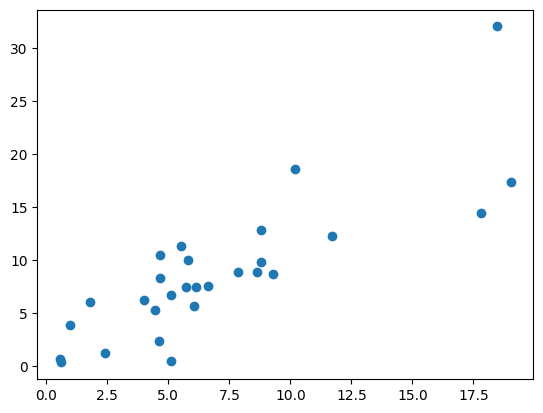


 Separate Statistics 

ref-orig | µ(nli_contrast_cont) = 7.0 | σ(nli_contrast_cont) = 4.8
ref-para | µ(nli_contrast_cont) = 8.7 | σ(nli_contrast_cont) = 6.4

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.8270388615216201, pvalue=5.7795411180566074e-08)
Correlation = 0.83
µ(ref-para) = -1.8 | σ(ref-para) = 3.6 


NLI_CONTRAST_CONT | REF[0] VS PARAPHRASE


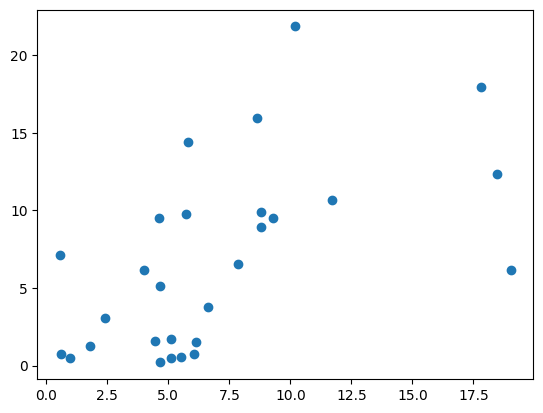


 Separate Statistics 

ref[0]-orig | µ(nli_contrast_cont) = 7.0 | σ(nli_contrast_cont) = 4.8
ref[0]-para | µ(nli_contrast_cont) = 6.7 | σ(nli_contrast_cont) = 5.8

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.608648056923919, pvalue=0.0005886970616569901)
Correlation = 0.57
µ(ref[0]-para) = 0.3 | σ(ref[0]-para) = 5.0 


ENT + NEUT - CONT | REF VS PARAPHRASE


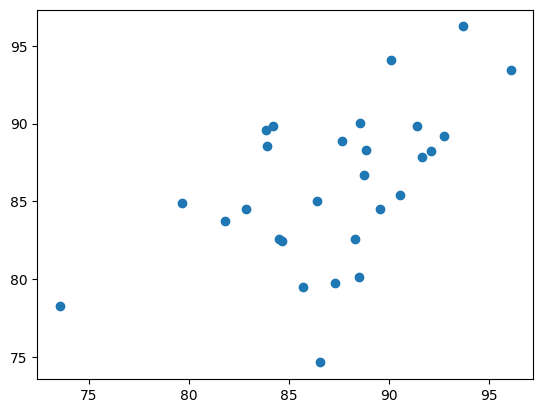


 Separate Statistics 

ref-orig | µ(ENT + NEUT - CONT) = 87.3 | σ(ENT + NEUT - CONT) = 4.6
ref-para | µ(ENT + NEUT - CONT) = 86.0 | σ(ENT + NEUT - CONT) = 4.9

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.5150519978106185, pvalue=0.005036770256584672)
Correlation = 0.54
µ(ref-para) = 1.2 | σ(ref-para) = 4.6 


ENT + NEUT - CONT | REF[0] VS PARAPHRASE


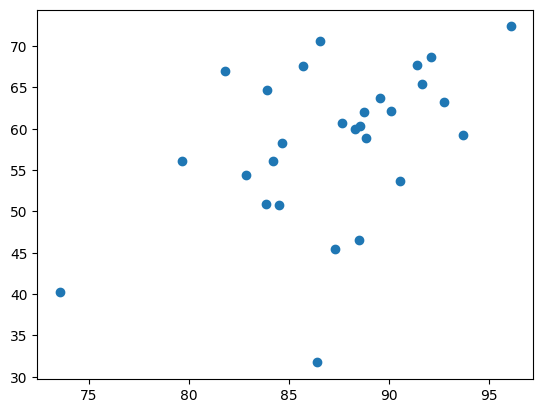


 Separate Statistics 

ref[0]-orig | µ(ENT + NEUT - CONT) = 87.3 | σ(ENT + NEUT - CONT) = 4.6
ref[0]-para | µ(ENT + NEUT - CONT) = 58.5 | σ(ENT + NEUT - CONT) = 9.2

Combined Statistics 

Spearman Rank Correlation = SignificanceResult(statistic=0.4455391351943076, pvalue=0.017498464453066985)
Correlation = 0.46
µ(ref[0]-para) = 28.8 | σ(ref[0]-para) = 8.2 



In [27]:
## ONLY ENTAILMENT SCORES

alpha_ent = 1
alpha_neut = 0
alpha_cont = 0

# Aggregate contrast NLI scores on the original dataset, taking refs_<a/b/comm>[0]
nli_ref_orig = nli_contrast_real_neut(data_path='data/contrast_final.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Aggregate contrast NLI scores on paraphrases of refs_<a/b/comm>[0]
nli_ref_para = nli_contrast_real_neut(data_path='data/contrast_paraphrase_1.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Compare original and paraphrase scores
compare_orig_para(nli_ref_orig, nli_ref_para, orig_type='ref', score_type='nli_contrast_ent')

# Aggregate contrast NLI scores on lower bound dataset of paraphrase triples of refs_<a>[0]
nli_ref_self_para = nli_contrast_real_neut(data_path='data/contrast_paraphrase_2.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Compare original with Lower Bound Paraphrase triples
compare_orig_para(nli_ref_orig, nli_ref_self_para, orig_type='ref[0]', score_type='nli_contrast_ent')


## ONLY NEUTRALITY SCORES

alpha_ent = 0
alpha_neut = 1
alpha_cont = 0

# Aggregate contrast NLI scores on the original dataset, taking refs_<a/b/comm>[0]
nli_ref_orig = nli_contrast_real_neut(data_path='data/contrast_final.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Aggregate contrast NLI scores on paraphrases of refs_<a/b/comm>[0]
nli_ref_para = nli_contrast_real_neut(data_path='data/contrast_paraphrase_1.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Compare original and paraphrase scores
compare_orig_para(nli_ref_orig, nli_ref_para, orig_type='ref', score_type='nli_contrast_neut')

# Aggregate contrast NLI scores on lower bound dataset of paraphrase triples of refs_<a>[0]
nli_ref_self_para = nli_contrast_real_neut(data_path='data/contrast_paraphrase_2.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Compare original with Lower Bound Paraphrase triples
compare_orig_para(nli_ref_orig, nli_ref_self_para, orig_type='ref[0]', score_type='nli_contrast_neut')


## ONLY CONTRADICTION SCORES
alpha_ent = 0
alpha_neut = 0
alpha_cont = 1

# Aggregate contrast NLI scores on the original dataset, taking refs_<a/b/comm>[0]
nli_ref_orig = nli_contrast_real_neut(data_path='data/contrast_final.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Aggregate contrast NLI scores on paraphrases of refs_<a/b/comm>[0]
nli_ref_para = nli_contrast_real_neut(data_path='data/contrast_paraphrase_1.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Compare original and paraphrase scores
compare_orig_para(nli_ref_orig, nli_ref_para, orig_type='ref', score_type='nli_contrast_cont')

# Aggregate contrast NLI scores on lower bound dataset of paraphrase triples of refs_<a>[0]
nli_ref_self_para = nli_contrast_real_neut(data_path='data/contrast_paraphrase_2.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Compare original with Lower Bound Paraphrase triples
compare_orig_para(nli_ref_orig, nli_ref_self_para, orig_type='ref[0]', score_type='nli_contrast_cont')


## ENTAILMENT + NEUTRALITY + CONTRADICTION 
alpha_ent = -1
alpha_neut = 1
alpha_cont = 1

# Aggregate contrast NLI scores on the original dataset, taking refs_<a/b/comm>[0]
nli_ref_orig = nli_contrast_real_neut(data_path='data/contrast_final.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Aggregate contrast NLI scores on paraphrases of refs_<a/b/comm>[0]
nli_ref_para = nli_contrast_real_neut(data_path='data/contrast_paraphrase_1.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Compare original and paraphrase scores
compare_orig_para(nli_ref_orig, nli_ref_para, orig_type='ref', score_type='ENT + NEUT - CONT')

# Aggregate contrast NLI scores on lower bound dataset of paraphrase triples of refs_<a>[0]
nli_ref_self_para = nli_contrast_real_neut(data_path='data/contrast_paraphrase_2.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Compare original with Lower Bound Paraphrase triples
compare_orig_para(nli_ref_orig, nli_ref_self_para, orig_type='ref[0]', score_type='ENT + NEUT - CONT')

## Treat Neutrality Scores as 1,0 Depending on Bi Neutrality of each sentence

In [15]:
def nli_contrast_bin_neut(data_path:str, pairwise_aggregation:str = 'sum', alphas: Tuple = (0,1,1)) -> List[float]:
  alpha_ent = alphas[0]
  alpha_neut = alphas[1]
  alpha_cont = alphas[2]
  ## AGGREGATE NLI FOR ORIGINAL
  df = pd.read_csv(data_path)

  for label in ['cont','ent', 'neut']:
    if pairwise_aggregation == 'sum':
      df[f'agg_{label}'] = (df[f'1_2_{label}'] + df[f'2_1_{label}'])/2
    else:
      df[f'agg_{label}'] = np.maximum(df[f'1_2_{label}'], df[f'2_1_{label}'])

  # a, b
  # a, comm
  # b, comm

  df['ent_final'] = alpha_ent * df['agg_ent']
  df['cont_final'] = alpha_cont * df['agg_cont']

  df['bi_neut'] = df.apply(lambda row: 1 if row['1_2_Label']==row['2_1_Label']=='NEUTRAL' else 0, axis = 1)
  pivot_sent1_entity = df.pivot_table(values = ['agg_neut', 'bi_neut', 'ent_final', 'cont_final'], index = ['Type','Sample', 'Sent1_entity','Sent2_entity', 'Sentence1'], aggfunc = 'mean', fill_value = 0).reset_index().rename(mapper={'Sent1_entity':'sent_entity' ,'Sent2_entity':'other_entity', 'Sentence1':'sentence'}, axis=1)
  pivot_sent2_entity = df.pivot_table(values = ['agg_neut', 'bi_neut', 'ent_final', 'cont_final'], index = ['Type','Sample', 'Sent1_entity', 'Sent2_entity', 'Sentence2'], aggfunc = 'mean', fill_value = 0).reset_index().rename(mapper={'Sent2_entity':'sent_entity' ,'Sent1_entity':'other_entity', 'Sentence2':'sentence'}, axis=1)
  
  pivot_sent_entity = pd.concat([pivot_sent1_entity, pivot_sent2_entity])
  
  pivot_sent_entity['bi_neut_binary'] = pivot_sent_entity['bi_neut'].apply(lambda bi_neut: alpha_neut * 1 if bi_neut==1.0 else 0) 

  pivot_summ_pair = pivot_sent_entity.pivot_table(values = ['ent_final','cont_final', 'bi_neut_binary'], index = ['Type','Sample'], aggfunc = 'mean', fill_value = 0).rename(mapper={'bi_neut_binary': 'bi_neut_final'}, axis=1)
  # display(pivot_summ_pair)
  pivot_summ_pair['total'] = pivot_summ_pair['ent_final'] + pivot_summ_pair['cont_final'] + pivot_summ_pair['bi_neut_final']

  # display(pivot_summ_pair)
  
  # display(pivot_summ_pair[pivot_summ_pair.index.isin(['ref'], level=0)])
  # df.to_csv("pivot_summ_fair.csv")

  return pivot_summ_pair[pivot_summ_pair.index.isin(['ref'], level=0)]['total'].to_list()

In [19]:
## ONLY ENTAILMENT SCORES

alpha_ent = 1
alpha_neut = 0
alpha_cont = 0

# Aggregate contrast NLI scores on the original dataset, taking refs_<a/b/comm>[0]
nli_ref_orig = nli_contrast_bin_neut(data_path='data/contrast_final.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Aggregate contrast NLI scores on paraphrases of refs_<a/b/comm>[0]
nli_ref_para = nli_contrast_bin_neut(data_path='data/contrast_paraphrase_1.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

indices = np.array(range(20,48))
diff = indices[(-np.absolute(np.array(nli_ref_para) - np.array(nli_ref_orig))).argsort()[:3]]
print(diff)

# # Compare original and paraphrase scores
# compare_orig_para(nli_ref_orig, nli_ref_para, orig_type='ref', score_type='nli_contrast_ent')

# # Aggregate contrast NLI scores on lower bound dataset of paraphrase triples of refs_<a>[0]
# nli_ref_self_para = nli_contrast_bin_neut(data_path='data/contrast_paraphrase_2.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# # Compare original with Lower Bound Paraphrase triples
# compare_orig_para(nli_ref_orig, nli_ref_self_para, orig_type='ref[0]', score_type='nli_contrast_ent')


## ONLY NEUTRALITY SCORES

alpha_ent = 0
alpha_neut = 1
alpha_cont = 0

# Aggregate contrast NLI scores on the original dataset, taking refs_<a/b/comm>[0]
nli_ref_orig = nli_contrast_bin_neut(data_path='data/contrast_final.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Aggregate contrast NLI scores on paraphrases of refs_<a/b/comm>[0]
nli_ref_para = nli_contrast_bin_neut(data_path='data/contrast_paraphrase_1.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

indices = np.array(range(20,48))
diff = indices[(-np.absolute(np.array(nli_ref_para) - np.array(nli_ref_orig))).argsort()[:3]]
print(diff)

# # Compare original and paraphrase scores
# compare_orig_para(nli_ref_orig, nli_ref_para, orig_type='ref', score_type='nli_contrast_neut')

# # Aggregate contrast NLI scores on lower bound dataset of paraphrase triples of refs_<a>[0]
# nli_ref_self_para = nli_contrast_bin_neut(data_path='data/contrast_paraphrase_2.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# # Compare original with Lower Bound Paraphrase triples
# compare_orig_para(nli_ref_orig, nli_ref_self_para, orig_type='ref[0]', score_type='nli_contrast_neut')


## ONLY CONTRADICTION SCORES
alpha_ent = 0
alpha_neut = 0
alpha_cont = 1

# Aggregate contrast NLI scores on the original dataset, taking refs_<a/b/comm>[0]
nli_ref_orig = nli_contrast_bin_neut(data_path='data/contrast_final.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Aggregate contrast NLI scores on paraphrases of refs_<a/b/comm>[0]
nli_ref_para = nli_contrast_bin_neut(data_path='data/contrast_paraphrase_1.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

indices = np.array(range(20,48))
diff = indices[(-np.absolute(np.array(nli_ref_para) - np.array(nli_ref_orig))).argsort()[:3]]
print(diff)

# # Compare original and paraphrase scores
# compare_orig_para(nli_ref_orig, nli_ref_para, orig_type='ref', score_type='nli_contrast_cont')

# # Aggregate contrast NLI scores on lower bound dataset of paraphrase triples of refs_<a>[0]
# nli_ref_self_para = nli_contrast_bin_neut(data_path='data/contrast_paraphrase_2.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# # Compare original with Lower Bound Paraphrase triples
# compare_orig_para(nli_ref_orig, nli_ref_self_para, orig_type='ref[0]', score_type='nli_contrast_cont')


## ENTAILMENT + NEUTRALITY + CONTRADICTION 
alpha_ent = -1
alpha_neut = 1
alpha_cont = 1

# Aggregate contrast NLI scores on the original dataset, taking refs_<a/b/comm>[0]
nli_ref_orig = nli_contrast_bin_neut(data_path='data/contrast_final.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# Aggregate contrast NLI scores on paraphrases of refs_<a/b/comm>[0]
nli_ref_para = nli_contrast_bin_neut(data_path='data/contrast_paraphrase_1.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

indices = np.array(range(20,48))
diff = indices[(-np.absolute(np.array(nli_ref_para) - np.array(nli_ref_orig))).argsort()[:3]]
print(diff)

# # Compare original and paraphrase scores
# compare_orig_para(nli_ref_orig, nli_ref_para, orig_type='ref', score_type='ENT + NEUT - CONT')

# # Aggregate contrast NLI scores on lower bound dataset of paraphrase triples of refs_<a>[0]
# nli_ref_self_para = nli_contrast_bin_neut(data_path='data/contrast_paraphrase_2.csv',pairwise_aggregation='sum',alphas=(alpha_ent,alpha_neut,alpha_cont))

# # Compare original with Lower Bound Paraphrase triples
# compare_orig_para(nli_ref_orig, nli_ref_self_para, orig_type='ref[0]', score_type='ENT + NEUT - CONT')

[35 31 27]
[32 31 28]
[34 47 25]
[31 27 32]


In [ ]:
para_data_3 = json.load(open("data/paraphrase_data_3_refs.json",'r'))

new_para_data_3 = []
for example in para_data_3:
  new_example = dict()
  new_example.update(example)
  for header in example:
    if header=='gen_a':
      new_example['refs_a'] = [example['gen_a']]
    elif header=='gen_b':
      new_example['refs_b'] = [example['gen_b']]
    elif header=='gen_comm':
      new_example['refs_comm'] = [example['gen_comm']]
  
  new_para_data_3.append(new_example)

json.dump(new_para_data_3, open("data/paraphrase_data_3_refs_restructured.json",'w'))

check_written_dataset(new_para_data_3)

In [ ]:
## GET NLI for paraphrases
nli_metric = SummNLI(data_path='data/paraphrase_data_2_restructured.json', data_type='paraphrase')
nli_metric.compute()

In [ ]:
## GET NLI for paraphrases
nli_metric = SummNLI(data_path='data/paraphrase_data_3_refs_restructured.json', data_type='paraphrase')
nli_metric.compute()

# NLI(Factuality) Reference vs Paraphrase

In [21]:
def nli_fact_bin_ent(data_path: str = "data/factuality_popular_final.csv") -> List[float]:
  df = pd.read_csv(data_path)
  

  df['is_ent'] = df.apply(lambda row: 1 if row['1_2_Label']=='ENTAILMENT' or row['2_1_Label']=='ENTAILMENT' else 0, axis = 1)
  # display(df)
  pivot_sent = df.pivot_table(values = ['is_ent'], index = ['Type','Sample', 'Sent2_entity','Sentence2'], aggfunc = 'sum', fill_value = 0).reset_index().rename(mapper={'Sent2_entity':'summary' ,'Sentence2':'sentence'}, axis=1)
  # display(pivot_sent)
  
  pivot_sent['is_ent'] =  pivot_sent['is_ent'].apply(lambda no_ents: 1 if no_ents>0 else -1)
  # display(pivot_sent)
  pivot_sent.to_csv("temp.csv")
  pivot_summ_pair = pivot_sent.pivot_table(values = ['is_ent'], index = ['Type','Sample'], aggfunc = 'mean', fill_value=0)

  display(pivot_summ_pair)

  # display(pivot_summ_pair[pivot_summ_pair.index.isin(['ref'], level=0)])
  # df.to_csv("pivot_summ_fair.csv")
  return pivot_summ_pair[pivot_summ_pair.index.isin(['ref'], level=0)]['is_ent'].to_list()

In [22]:
print(nli_fact_bin_ent())

is_ent
Type Sample          
gen  20      0.714286
     21      0.875000
     22      0.571429
     23      0.625000
     24      0.714286
     25      0.454545
     26      0.428571
     27      0.846154
     28      0.714286
     29      0.500000
     30      0.571429
     31      0.066667
     32      0.428571
     33      1.000000
     34      0.733333
     35      0.875000
     36      0.538462
     37      0.666667
     38      0.733333
     39      0.733333
     40      0.428571
     41      0.444444
     42      0.166667
     43      0.466667
     44      0.857143
     45      0.142857
     46      0.857143
     47      0.846154
ref  20      0.714286
     21      0.333333
     22      0.272727
     23      0.294118
     24      0.500000
     25      0.500000
     26      0.058824
     27      0.555556
     28      0.000000
     29      0.411765
     30      0.333333
     31      0.200000
     32      0.176471
     33      0.200000
     34      0.857143
     35      0.125000
     36      0.411765
     37      0.750000
     38      0.333333
     39      0.714286
     40      0.250000
     41      0.400000
     42      0.200000
     43      0.500000
     44      0.500000
     45      0.111111
     46      0.714286
     47      0.733333

[0.7142857142857143, 0.3333333333333333, 0.2727272727272727, 0.29411764705882354, 0.5, 0.5, 0.058823529411764705, 0.5555555555555556, 0.0, 0.4117647058823529, 0.3333333333333333, 0.2, 0.17647058823529413, 0.2, 0.8571428571428571, 0.125, 0.4117647058823529, 0.75, 0.3333333333333333, 0.7142857142857143, 0.25, 0.4, 0.2, 0.5, 0.5, 0.1111111111111111, 0.7142857142857143, 0.7333333333333333]


# Length Analysis

In [ ]:
dataset = json.load(open("combined_data.json", 'r'))

# For reference summaries

cont_word_counts = []
cont_token_counts = []
num_cont_summs = 0

comm_word_counts = []
comm_token_counts = []
num_comm_summs = 0

for idx, data in enumerate(dataset):
  for summ_type in ['refs_a', 'refs_b']:
    cont_word_counts.extend([sum([1 for word in summ.split(" ") if word != '']) for summ in data[summ_type]])
    cont_token_counts.extend([len(tokenizer(summ)['input_ids']) for summ in data[summ_type]])
  summ_type = 'refs_comm'
  comm_word_counts.extend([sum([1 for word in summ.split(" ") if word != '']) for summ in data[summ_type]])
  comm_token_counts.extend([len(tokenizer(summ)['input_ids']) for summ in data[summ_type]])
  
  
print(sum(cont_word_counts)//len(cont_word_counts))
print(sum(cont_token_counts)//len(cont_token_counts))
print()
print(sum(comm_word_counts)//len(comm_word_counts))
print(sum(comm_token_counts)//len(comm_token_counts))


115
132

18
20


In [ ]:
dataset = json.load(open("combined_data.json", 'r'))
tokenizer = GPT2TokenizerFast.from_pretrained('gpt2')

In [ ]:
cont_word_counts = []
cont_token_counts = []

comm_word_counts = []
comm_token_counts = []

summ_types = ['gen_a', 'gen_b']

for idx, data in enumerate(dataset[20:]):
  for summ_type in summ_types:
    cont_word_counts.append(sum([1 for word in data[summ_type].split(" ") if word!='']))
    cont_token_counts.append(len(tokenizer(data[summ_type])['input_ids']))
  summ_type = 'gen_comm'
  comm_word_counts.append(sum([1 for word in data[summ_type].split(" ") if word!='']))
  comm_token_counts.append(len(tokenizer(data[summ_type])['input_ids']))

print(sum(cont_word_counts)//len(cont_word_counts))
print(sum(cont_token_counts)//len(cont_token_counts))
print()
print(sum(comm_word_counts)//len(comm_word_counts))
print(sum(comm_token_counts)//len(comm_token_counts))

90
106

19
21


In [ ]:
comb_data = json.load(open('combined_data.json', 'r'))
new_data = []
for idx in range(len(comb_data)):
  item = comb_data[idx]
  new_data.append({
      'split': item['split'],
      'entity_a': item['entity_a'],
      'entity_b': item['entity_a'],
      'entity_a_uid': item['entity_a_uid'],
      'entity_b_uid': item['entity_b_uid'],
      'refs_a': item['refs_a'],
      'refs_b': item['refs_b'],
      'refs_comm': item['refs_comm'],
  })

  if item['split'] in ['dev', 'test']:
    new_data[idx].update({
        'gen_a': item['gen_a'],
        'gen_b': item['gen_b'],
        'gen_comm': item['gen_comm'],
    })

json.dump(new_data, open("combined_data.json", 'w'))

In [ ]:
data = json.load(open("data/combined_data.json", 'r'))

want_headers = ['gen_a', 'gen_b', 'gen_comm', 'refs_a', 'refs_b', 'refs_comm', 'source_reviews_a', 'source_reviews_b']
sentences = []
for example in data:
  for header in want_headers:
    if header in example:
      if type(example[header]) is not list:
        example[header] = [example[header]]
      for summ in example[header]:
        # print(summ)
        sentences.extend(summ.split("."))

print(len(sentences))

6084
